# Pattern recognition using SLNNs
## Examples and more

Before starting, make sure you have the need libraries installed. If not, use ```pip3 install jupyter numpy scipy pandas```. We can import all functions and classes from ```main```. This notebook needs to be in the same directory as the python file.

In [1]:
from main import *

#### Add noise

We have the vector ```nums``` available to us. We can use ```num_show``` to show any number (or any similar matrix, like the weights).

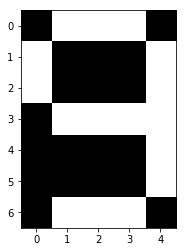

In [2]:
num_show(nums[9])

Adding noise is trivial with the ```add_noise``` function. We just have to specify the percentage of noise to add.

In [3]:
noisy = add_noise(nums[9], 0.05) # 5% of noise.
num_show(noisy)

#### Generate data

The ```gen_data``` function generates at the same time the train and test sets, with their corresponding labels. The arguments are the seed, the number of elements in the train set, the target numbers, the training and the noise percentage.

In [7]:
train, test, ytr, yte = gen_data(123, 10, [1,2,3], 0.5, 0.1)

The labels *ytr* and *yte* are binary numbers, telling us if the corresponding number is one of our targets or not.

array([1.])

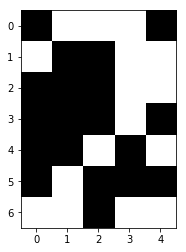

In [8]:
num_show(train[0])
ytr[0]

#### SLNN

There is a class ```SLNN``` available to us. With it, we can train a SLNN model, predict values with it, compute the accuracy...

In [11]:
train, test, ytr, yte = gen_data(123456, 500, [8], 0.5, 0.1)
net = SLNN()
net.train("BFGS", train, ytr)
net.summary(test, yte)

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	BFGS
Regularization parameter:	0
Loss:				118.46417176691992
Training accuracy:		83.4%
Test accuracy:			69.02%
---------------------------------------------------------------------------
Gradient: 
 [ 3.34755951 -2.75027427  1.53369366 -0.0117573   4.23008194 -4.08477929
  4.76065388  1.38514174  1.48382942 -4.20415297 -4.46852192  1.35253901
  3.00523672  2.55073946 -3.98047919  4.06434025 -7.99155245 -5.11153683
 -2.60581008  5.0110771  -7.08286649  1.78326372  5.47111578  1.49330305
 -3.01948757 -5.54125161  2.90135054  2.10486234  1.38959657 -4.59800561
  2.90079164 -2.12464488 -1.48855845 -0.35475382  1.73415255]
---------------------------------------------------------------------------


alpha        f(x)   ||g(x)||         r         M
0           NaN  125.000000  23.498640       NaN       NaN
1  1.254522e-02  121.438869  69.109355  2.940994  0.125156
2  1.019185e-09  118.630034  29.552085  0.427613  0.006187
3  4.751237e-16  118.464172  21.709071  0.734604  0.024858

There's another method of ```SLNN``` called ```cvtrain```, which will find a regularization parameter for us (using cross-validation) and train the model with it.

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	BFGS
Regularization parameter:	0.3
Loss:				45.64988762129941
Training accuracy:		95.6%
Test accuracy:			90.32%
---------------------------------------------------------------------------
Gradient: 
 [-0.17948467  0.13771914 -0.12362389  0.03798269 -0.05127049  0.13201352
  0.29118305 -0.14038465 -0.15749186  0.26065896 -0.32562301 -0.07579167
 -0.29402269 -0.35554792  0.2716692   0.32671559 -0.0893419   0.4035869
  0.188556    1.04683121 -0.68215907  0.05954559 -0.88975188 -0.04702216
  0.3506315   0.20085228 -0.34674192 -0.20652523 -0.02045568  0.81186022
 -0.39467069  0.11929531  0.45355152  0.13682345 -0.17175046]
---------------------------------------------------------------------------


alpha        f(x)    ||g(x)||         r         M
0           NaN  120.650476   21.797951       NaN       NaN
1  4.525402e-01   92.409202  126.689790  5.812005  0.266631
2  2.139093e-09   48.126839   45.508915  0.359215  0.002835
3  7.812548e-16   45.696399    7.200783  0.158228  0.003477
4  4.982071e-22   45.649975    2.231332  0.309874  0.043033
5  2.405773e-28   45.649888    2.182899  0.978294  0.438435

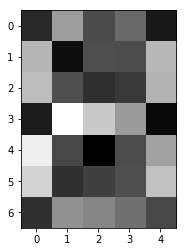

In [7]:
train, test, ytr, yte = gen_data(123456, 500, [8], 0.5, 0.1)
net = SLNN()
net.cvtrain("BFGS", train, ytr)
net.summary(test, yte)

Besides, we can use other optimization algorithms, apart from ```BFGS```, such as ```GM``` and ```CGM```:

In [8]:
train, test, ytr, yte = gen_data(123456, 500, [0,2,4,6,8], 0.5, 0.1)
net = SLNN()
net.cvtrain("GM", train, ytr)
gmdata = net.summary(test, yte)
show_less(gmdata)

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	GM
Regularization parameter:	0.3
Loss:				59.76546148734177
Training accuracy:		91.8%
Test accuracy:			91.74%
---------------------------------------------------------------------------
Gradient: 
 [ 1.19951085e-03  1.50044010e-03  1.69929364e-03  6.18663291e-04
  6.59133453e-04 -1.19440998e-04  1.10866366e-03  1.15008558e-03
  4.34778404e-04  9.17904239e-04  3.73865326e-04  1.45465701e-03
  1.83815827e-03  1.48366212e-03  2.08612429e-03  9.63242456e-04
  8.46120655e-04  1.01727052e-03  1.11718742e-03  1.15677504e-03
  1.34278873e-03  1.33297816e-03 -6.32018050e-04  1.38657291e-03
  3.90431816e-04  1.10952066e-04  7.47284262e-04  8.36258958e-05
  1.57683333e-03  2.25049988e-03  1.95205654e-03  2.07427

alpha       f(x)   ||g(x)||         r           M
0          NaN  86.378331   9.418853       NaN         NaN
1     0.043930  84.515953  55.797009  5.923971    0.628948
2     0.001208  82.682865   8.913590  0.159750    0.002863
3     0.009881  82.305911  24.861373  2.789154    0.312910
4     0.001232  81.911275   8.398785  0.337825    0.013588
996   0.005637  59.765462   0.007265  1.501621  310.360044
997   0.002493  59.765462   0.004791  0.659366   90.755228
998   0.005793  59.765462   0.007337  1.531629  319.721362
999   0.002462  59.765462   0.004742  0.646220   88.073509
1000  0.005961  59.765461   0.007408  1.562416  329.519093

/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	CGM
Regularization parameter:	0.3
Loss:				59.76544467469943
Training accuracy:		91.8%
Test accuracy:			91.74%
---------------------------------------------------------------------------
Gradient: 
 [-1.63676821e-06 -2.80853117e-06 -1.49983591e-06 -7.88920605e-07
 -3.88600025e-07 -2.46169536e-06  6.48836058e-07 -1.44904282e-06
 -2.61334229e-07 -2.72747592e-06 -1.34705380e-06 -1.04352394e-06
 -1.12490310e-06 -6.46491019e-07 -2.10898422e-06 -5.75302690e-07
 -5.86047379e-07 -8.67422613e-08  9.19232325e-07 -2.90110641e-06
 -1.03811214e-06 -3.14049655e-08 -7.58951656e-07 -4.42431962e-07
 -5.69555458e-07 -1.43118897e-06 -8.36312902e-07 -1.81945037e-06
  2.61034144e-07 -1.01138623e-06 -6.52513469e-07 -1.6773

alpha       f(x)   ||g(x)||         r              M
0         NaN  86.378331   9.418855       NaN            NaN
1    0.043930  84.515973  55.796756  5.923943       0.628945
2    0.001208  82.682902   8.913566  0.159751       0.002863
3    0.031102  81.509110  42.162496  4.730149       0.530669
4    0.010776  68.077203   4.182219  0.099193       0.002353
104  0.005279  59.765445   0.000075  0.887789   10497.450059
105  0.001561  59.765445   0.000011  0.140005    1864.694241
106  0.004038  59.765445   0.000014  1.321918  125754.937704
107  0.070942  59.765445   0.000067  4.852179  349182.836607
108  0.003058  59.765445   0.000008  0.121314    1799.239524

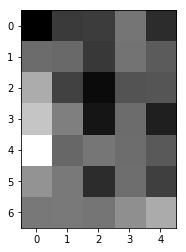

In [9]:
train, test, ytr, yte = gen_data(123456, 500, [0,2,4,6,8], 0.5, 0.1)
net = SLNN()
net.cvtrain("CGM", train, ytr)
cgmdata = net.summary(test, yte)
show_less(cgmdata)

And we can plot the gradient norm and the rates...

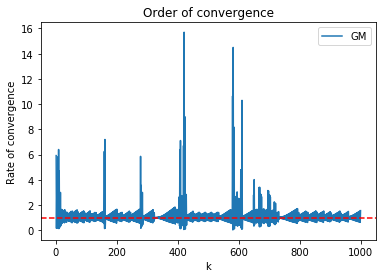

In [10]:
plt.figure()
plt.ylabel('Rate of convergence')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(gmdata['r'], label = "GM")
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.legend()
plt.show()

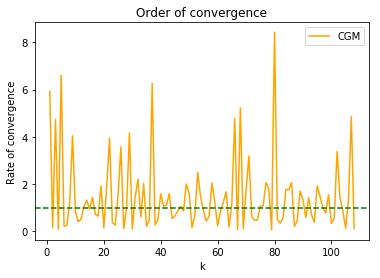

In [13]:
plt.figure()
plt.ylabel('Rate of convergence')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(cgmdata['r'], label = "CGM", color = "orange")
plt.axhline(y = 1, color = 'green', linestyle = '--')
plt.legend()
plt.show()

And compare:

In [15]:
plt.figure()
plt.ylabel('Rate of convergence')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(gmdata['r'][1:110], label = "GM")
plt.plot(cgmdata['r'], label = "CGM", color = "orange")
plt.axhline(y = 1, color = 'green', linestyle = '--')
plt.legend()
plt.show()

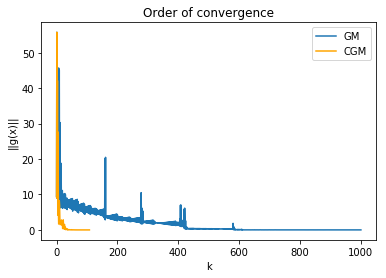

In [16]:
plt.figure()
plt.ylabel('||g(x)||')
plt.xlabel('k')
plt.title('Order of convergence')
plt.plot(gmdata['||g(x)||'], label = "GM")
plt.plot(cgmdata['||g(x)||'], label = "CGM", color = 'orange')
plt.legend()
plt.show()